# 長期・中期・短期の株価チャート

## 分析環境の構築

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import mplfinance as mpf
from datetime import date, datetime, timedelta
import yfinance as yf
import pandas_ta as ta

## 銘柄の指定

In [2]:
ticker = '7201.T'

## 月足チャート

In [3]:
end_date = datetime.today()
start_date = end_date - timedelta(days=4500)
yf.pdr_override()
# yahooサイトからデータをダウンロード
df_m = pdr.get_data_yahoo(ticker, start_date, end_date, interval='1mo')
df_m.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-01,585.000000,588.799988,532.400024,554.200012,545.015381,525398100
2024-01-01,554.200012,589.400024,549.099976,588.400024,578.648621,489780000
2024-02-01,580.000000,625.400024,542.700012,588.799988,579.041931,702437600
2024-03-01,588.000000,651.500000,523.799988,607.000000,596.940308,802433000
2024-04-01,612.500000,616.299988,536.299988,550.400024,550.400024,401496900


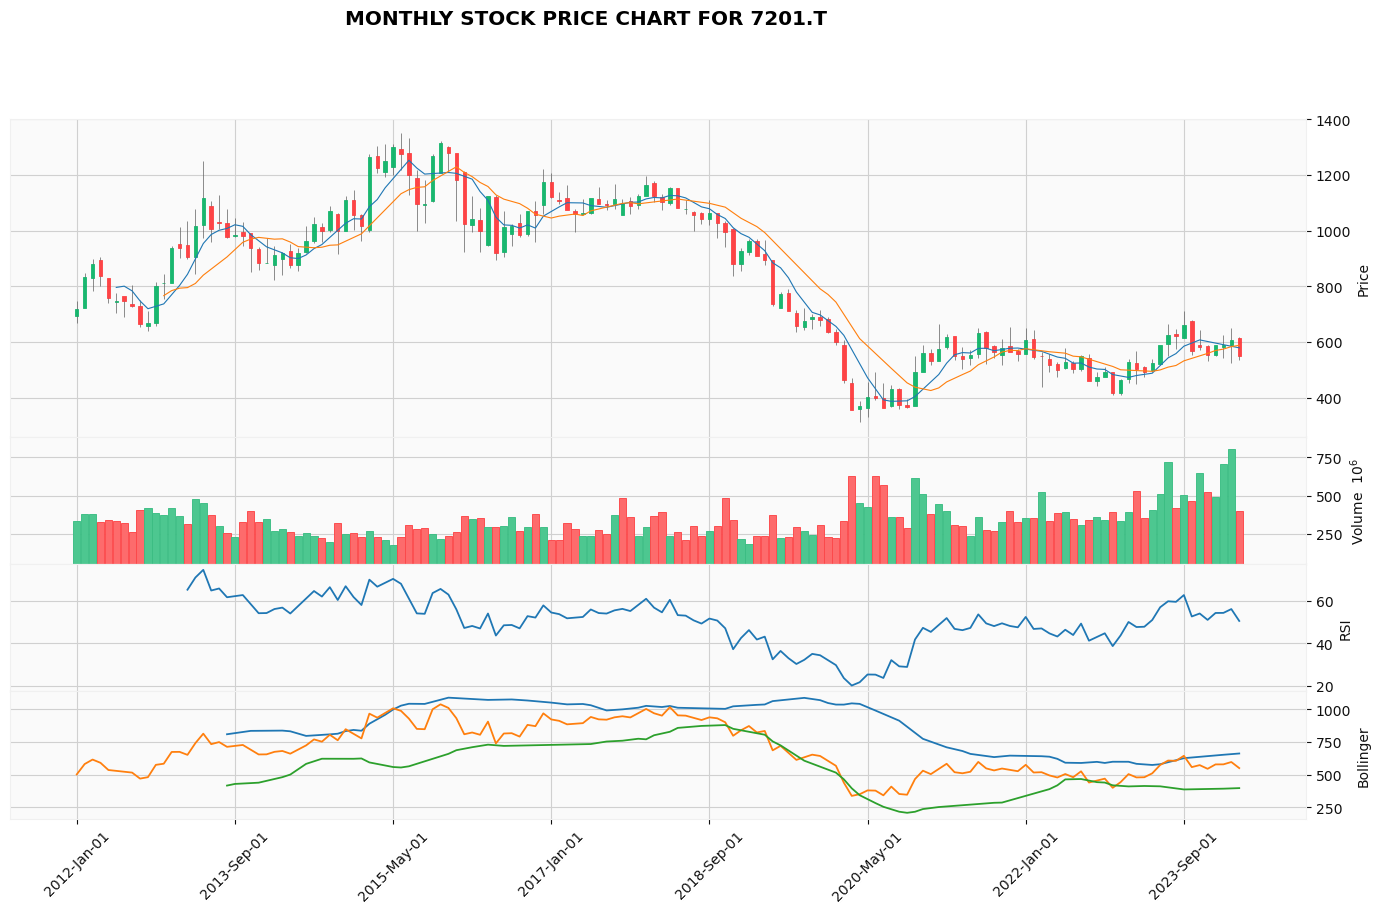

In [4]:
# Calculate indicators
df_m['RSI'] = ta.rsi(df_m['Adj Close'], length=14)
df_m.ta.bbands(close='Adj Close', length=20, std=2, append=True)

# mplfinanceのmake_addplotメソッドを用いてチャートに付け加えるプロットを作成する
idx_plot = [
    mpf.make_addplot((df_m['RSI']), panel=2, ylabel='RSI', secondary_y=False),
    mpf.make_addplot((df_m['BBU_20_2.0']), panel=3, ylabel='Bollinger', secondary_y=False),
    mpf.make_addplot((df_m['Adj Close']), panel=3, secondary_y=False),
    mpf.make_addplot((df_m['BBL_20_2.0']), panel=3, secondary_y=False),
]

# 上記で作成したプロットのリストを引数addplot=で指定してチャートの下にMACDのプロットを付け加える
mpf.plot(df_m,type='candle',figsize =(18,10), style='yahoo',mav=(6,12),
          volume=True, addplot=idx_plot,
          title = "MONTHLY STOCK PRICE CHART FOR {0}".format(ticker))

## 週足チャート

In [5]:
end_date = datetime.today()
start_date = end_date - timedelta(days=1000)
yf.pdr_override()
# yahooサイトからデータをダウンロード
df_w = pdr.get_data_yahoo(ticker, start_date, end_date, interval='1wk')
df_w.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-25,637.700012,644.500000,590.599976,607.000000,596.940308,171246300
2024-04-01,612.500000,616.299988,569.400024,577.500000,577.500000,111000200
2024-04-08,578.799988,600.200012,574.000000,591.700012,591.700012,109130400
2024-04-15,584.299988,589.200012,556.700012,561.400024,561.400024,109570000
2024-04-22,543.000000,551.000000,536.299988,550.400024,550.400024,0


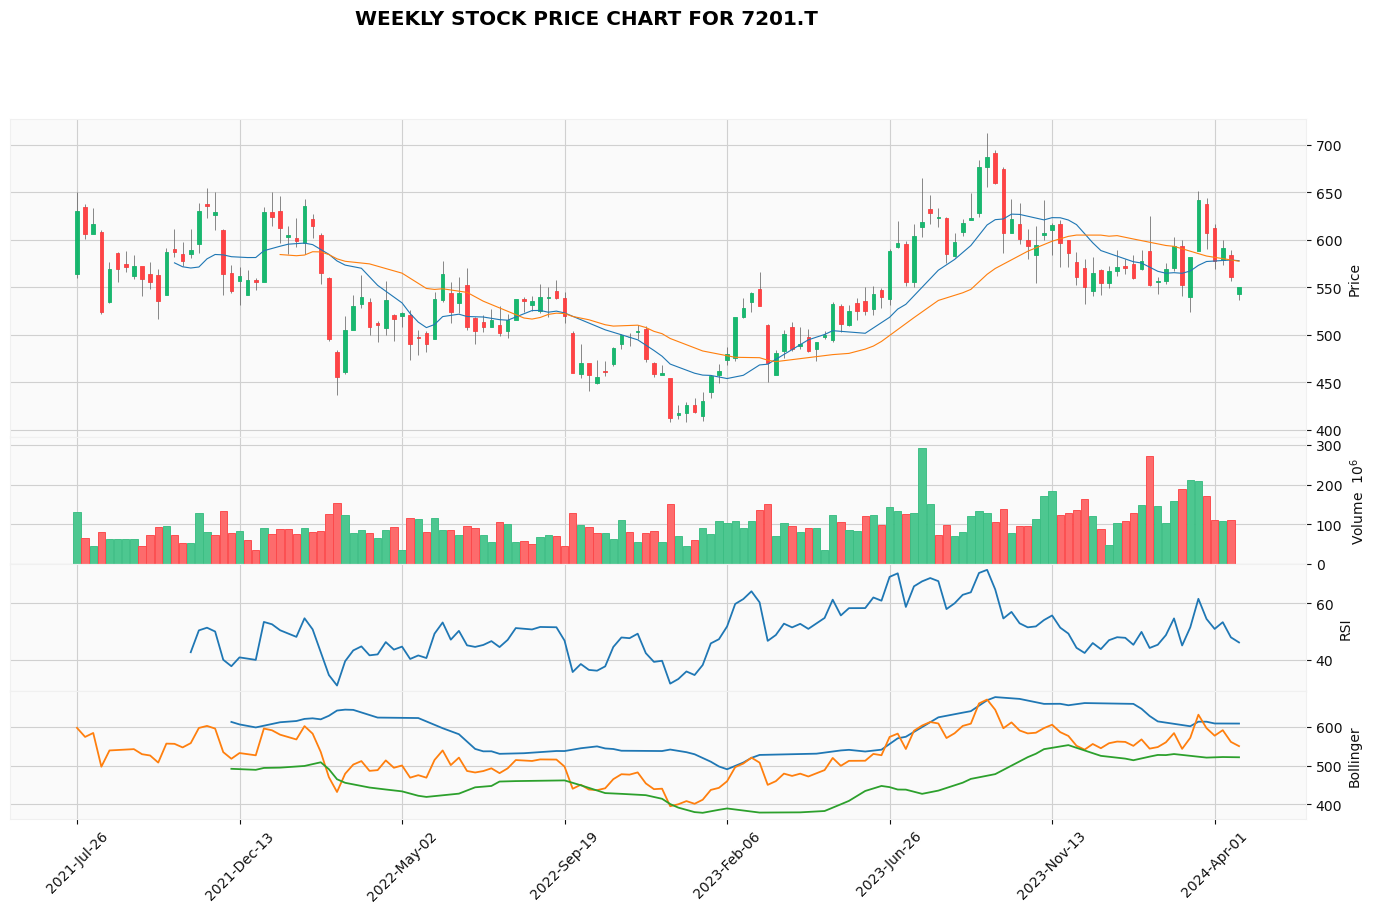

In [6]:
# Calculate indicators
df_w['RSI'] = ta.rsi(df_w['Adj Close'], length=14)
df_w.ta.bbands(close='Adj Close', length=20, std=2, append=True)

# mplfinanceのmake_addplotメソッドを用いてチャートに付け加えるプロットを作成する
idx_plot = [
    mpf.make_addplot((df_w['RSI']), panel=2, ylabel='RSI', secondary_y=False),
    mpf.make_addplot((df_w['BBU_20_2.0']), panel=3, ylabel='Bollinger', secondary_y=False),
    mpf.make_addplot((df_w['Adj Close']), panel=3, secondary_y=False),
    mpf.make_addplot((df_w['BBL_20_2.0']), panel=3, secondary_y=False),
]

# 上記で作成したプロットのリストを引数addplot=で指定してチャートの下にMACDのプロットを付け加える
mpf.plot(df_w,type='candle',figsize =(18,10), style='yahoo',mav=(13,26),
          volume=True, addplot=idx_plot,
          title = "WEEKLY STOCK PRICE CHART FOR {0}".format(ticker))

## 日足チャート

In [7]:
end_date = datetime.today()
start_date = end_date - timedelta(days=180)
yf.pdr_override()
# yahooサイトからデータをダウンロード
df_d = pdr.get_data_yahoo(ticker, start_date, end_date, interval='1d')
df_d.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,583.000000,589.200012,576.400024,578.900024,578.900024,22210700
2024-04-17,584.500000,585.700012,564.700012,566.500000,566.500000,24523500
2024-04-18,569.700012,577.299988,565.599976,570.000000,570.000000,19448700
2024-04-19,569.900024,572.700012,556.700012,561.400024,561.400024,26943500
2024-04-22,543.000000,551.000000,536.299988,550.400024,550.400024,71796300


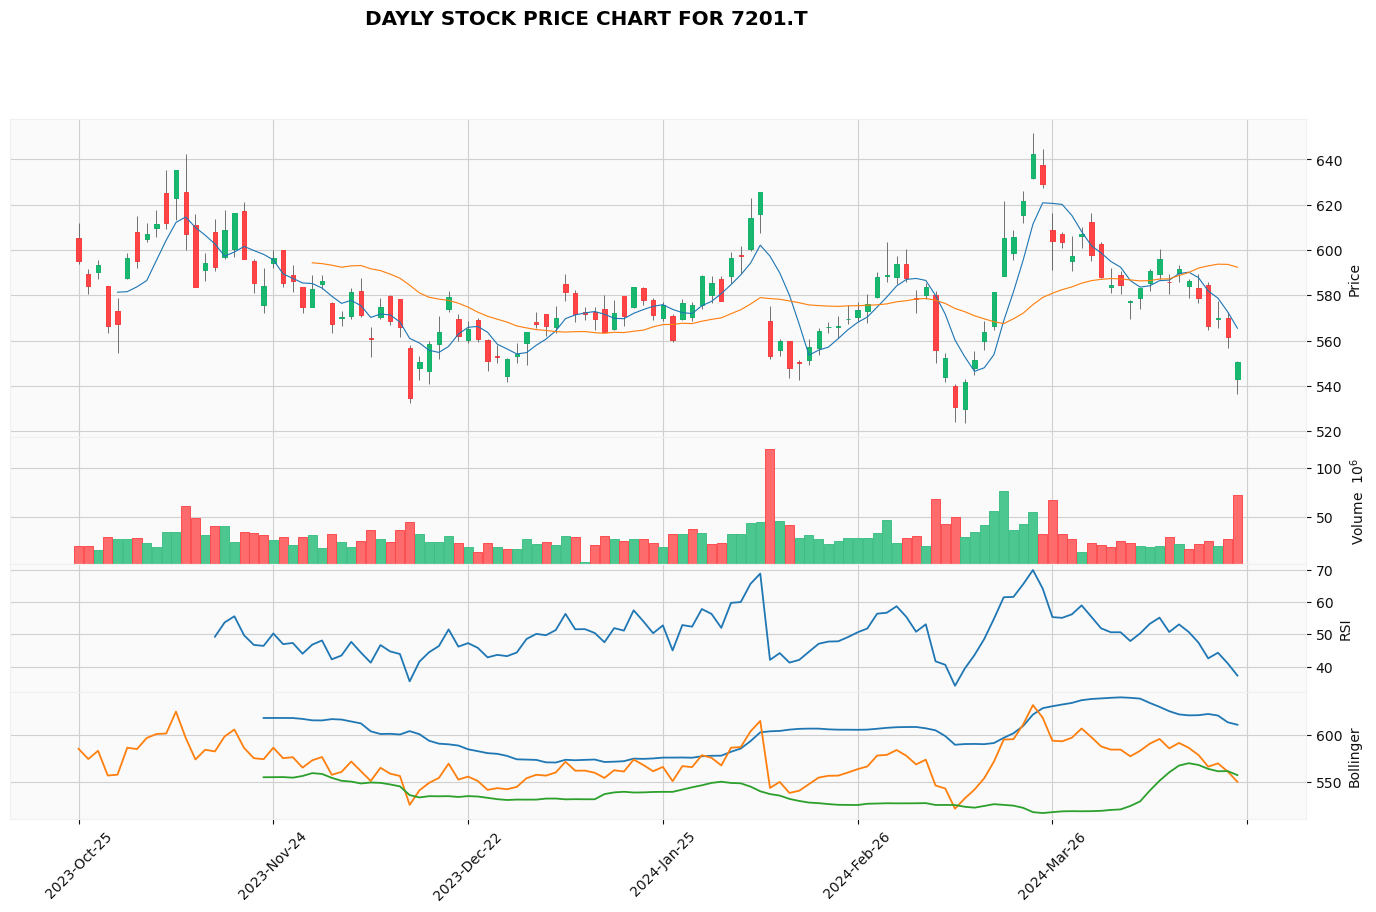

In [8]:
# Calculate indicators
df_d['RSI'] = ta.rsi(df_d['Adj Close'], length=14)
df_d.ta.bbands(close='Adj Close', length=20, std=2, append=True)

# mplfinanceのmake_addplotメソッドを用いてチャートに付け加えるプロットを作成する
idx_plot = [
    mpf.make_addplot((df_d['RSI']), panel=2, ylabel='RSI', secondary_y=False),
    mpf.make_addplot((df_d['BBU_20_2.0']), panel=3, ylabel='Bollinger', secondary_y=False),
    mpf.make_addplot((df_d['Adj Close']), panel=3, secondary_y=False),
    mpf.make_addplot((df_d['BBL_20_2.0']), panel=3, secondary_y=False),
]

# 上記で作成したプロットのリストを引数addplot=で指定してチャートの下にMACDのプロットを付け加える
mpf.plot(df_d,type='candle',figsize =(18,10), style='yahoo',mav=(5,25),
          volume=True, addplot=idx_plot,
          title = "DAYLY STOCK PRICE CHART FOR {0}".format(ticker))